# Symbolic solution of ODEs

## Single Differential Equation

The command `dsolve` computes symbolic solutions to ordinary differential equations. The equations are specified by symbolic equations containing the command `diff` to denote differentiation, eg. solve
$$\frac{\mathrm dy}{\mathrm dx}=1+y^2$$

In [4]:
pkg load symbolic
syms x y(x) % y = sym('y(x)')
dsolve(diff(y, x)==1+y^2) 

ans = (sym) y(x) = -tan(C₁ - x)


Initial conditions can be specified by additional equations, eg.

In [5]:
dsolve(diff(y)==1+y^2, y(0)==1)

ans = (sym)

            ⎛    π⎞
  y(x) = tan⎜x + ─⎟
            ⎝    4⎠



Nonlinear equations may have multiple solutions, even when initial conditions are given, eg. solve
$$\left(\frac{\mathrm dx}{\mathrm dt}\right)^2+x^2=1$$
where $x(0)=0$:

In [14]:
syms t x(t)
x = dsolve((diff(x,t))^2+x^2==1, x(0)==0);
x1 = x{1} % MATLAB x1 = x(1)
x2 = x{2} % MATLAB x2 = x(2)

x1 = (sym) x(t) = -sin(t)
x2 = (sym) x(t) = sin(t)


Here is a second order differential equation with two initial conditions:
$$\frac{\mathrm d^2y}{\mathrm dx^2}=\cos(2x)-y$$
with $y(0)=1$ and $\frac{\mathrm dy}{\mathrm dx}(0)=0$:

In [7]:
syms x y(x)
Dy = diff(y, x);
y = dsolve(diff(y, 2)==cos(2*x)-y, y(0)==1, Dy(0)==0)

    minus at line 42 column 5
y = (sym)

         4⋅cos(x)   cos(2⋅x)
  y(x) = ──────── - ────────
            3          3    



## System of Differential Equations

The command `dsolve` can also handle several ordinary differential equations in several variables, with or without initial conditions, eg.

In [8]:
syms x f(x) g(x)
S = dsolve([diff(f)==3*f+4*g, diff(g)==-4*f+3*g]);
f = S{1} % MATLAB: f = S.f
g = S{2} % MATLAB: g = S.g

f = (sym)

                                        3⋅x
  f(x) = 4⋅(C₁⋅sin(4⋅x) + C₂⋅cos(4⋅x))⋅ℯ   

g = (sym)

                                          3⋅x
  g(x) = (4⋅C₁⋅cos(4⋅x) - 4⋅C₂⋅sin(4⋅x))⋅ℯ   



Initial conditions can also be included, eg:

In [9]:
syms x f(x) g(x)
S = dsolve([diff(f)==3*f+4*g, diff(g)==-4*f+3*g], f(0)==0, g(0)==1);
f = S{1} % MATLAB: f = S.f
g = S{2} % MATLAB: g = S.g

f = (sym)

          3⋅x         
  f(x) = ℯ   ⋅sin(4⋅x)

g = (sym)

          3⋅x         
  g(x) = ℯ   ⋅cos(4⋅x)



# Numerical solution of ODEs

To solve the differential equation
$$\frac{\mathrm dy}{\mathrm dx}=f(x,y),\quad y(x_0)=y_0$$
we can use the forward derivative differencing formula:
$$y_{n+1}=y_n+hf(x_n,y_n)$$
where $x_n$ are de discrete values of $x$, $y_n$ the solutions of $y(x_n)$ and $h=x_{n+1}-x_n$.

In [10]:
function [x, y] = euler_ode(f, x_0, y_0, h, steps)
    x = x_0 + h * [0:steps];
    y = zeros(1, steps+1);
    y(1) = y_0;
    for i = 2:steps+1
        y(i) = y(i-1) + h * f(x(i-1), y(i-1));
    end
end

    plus at line 42 column 5


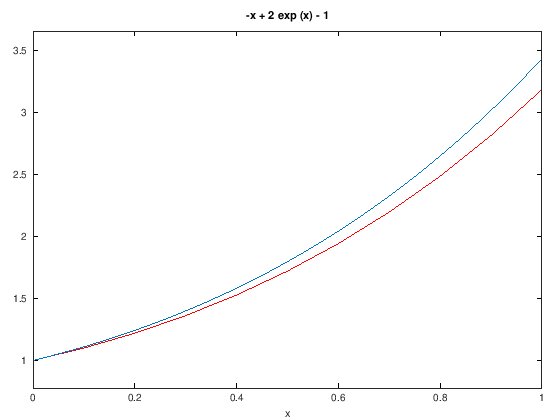

In [11]:
fh = @(x,y)x+y;
[x, y] = euler_ode(fh, 0, 1, 0.1, 10); % MATLAB euler_ode_matlab(fh, 0, 1, 0.01, 100);
plot(x,y,'r')
hold on
syms x y(x)
sol = simplify(dsolve(diff(y)==x+y, y(0)==1));
y_ex = rhs(sol); % MATLAB y_ex = sol;
ezplot(y_ex, [0,1])